In [276]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import pandas as pd
import seaborn as sns

# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

https://python-programming.quantecon.org/matplotlib.html

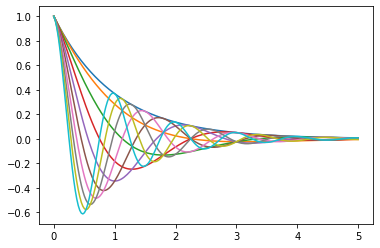

In [277]:
def f(x, θ):
    return np.cos(np.pi * θ * x ) * np.exp(-x) #function 

θ_vals = np.linspace(0, 2, 10) #Set theta vals
x = np.linspace(0,5,200) #Set x val
fig, ax = plt.subplots() #Prep empty canvas

for θ in θ_vals:
    ax.plot(x, f(x,θ)) #for each val in the theta vals, plot x, f(x)

plt.show()

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

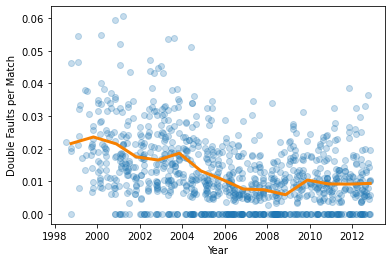

In [278]:
import datetime as dt

data = pd.read_csv('data/tennis.csv')#Read data

#Dub F per Match is a ratio of player double faults / their total points total 
data['Double Faults per Match'] = data['player1 double faults'] / data['player1 total points total']

#Convert start date to datetime object. Pass over changes
data['start date'] = pd.to_datetime(data['start date'])

#Group data by year. Will use methods on this later  
yearly_gb = data.groupby('year')

#Graph. 
fig, ax = plt.subplots()

#Scatter plot. 
plt.scatter(data['start date'],data['Double Faults per Match'],alpha=.25)

#Line
# convert to date time or error
# Use yearly_gb and get the max and the mean. HEX colour. 
plt.plot(pd.to_datetime(yearly_gb['start date'].max()),
         yearly_gb['Double Faults per Match'].mean(),
         color='#f78000',lw=3)

plt.xlabel('Year')
plt.ylabel('Double Faults per Match')

plt.show()


In [279]:
#data = pd.read_csv('data/tennis.csv')
#data['Double Faults per Match'] = data['player1 double faults'] / data['player1 total points total']
#data['start date'] = pd.to_datetime(data['start date'])
#this is the ratio that will become the y axis. 
#type(data['start date'][0])

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


https://python-programming.quantecon.org/pandas.html

In [280]:
import datetime as dt
from pandas_datareader import data

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

data = read_data(ticker_list)


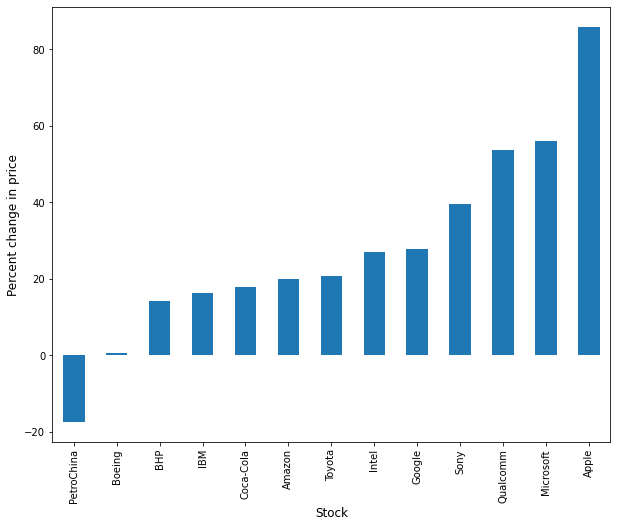

In [281]:
start_price = data.iloc[0] #Price start of 2019
end_price = data.iloc[-1] #Price end of 2019
price_diff = (end_price - start_price) / start_price * 100 #Use calc change formula

price_diff = price_diff.sort_values() #Could use inplace=True rather than reassigning
price_diff = price_diff.rename(index=ticker_list) #Changes to full names rather than abbreviations

fig,ax = plt.subplots(figsize=(10,8))#Sets the canvas size for multiple plots 

price_diff.plot(kind='bar') #Plots the data and sets kind of plot

ax.set_xlabel("Stock",fontsize=12) #Sets x axis label
ax.set_ylabel("Percent change in price",fontsize=12) #Sets y axis label 

plt.show() 

In [283]:
#saw this online: pct_change() method.
#change = ticker.pct_change(periods=len(ticker)-1, axis='rows')*100
#price_change = change.iloc[-1]
#price_change

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

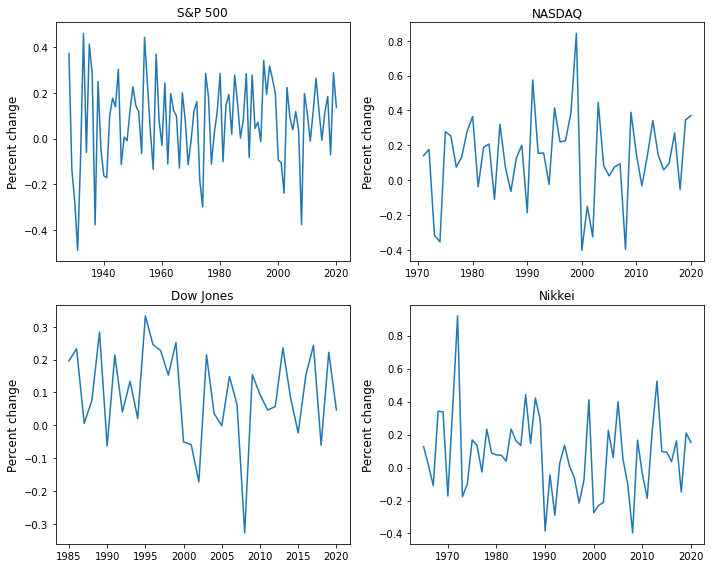

In [284]:
import datetime as dt
from pandas_datareader import data


indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

data = read_data(indices_list,start=dt.datetime(1928,1,2),end=dt.datetime(2020,12,31)) #Use read fn

yearly_returns = pd.DataFrame() #Create a new empty df to place values in 

for index, name in indices_list.items(): #.items() a view object, creates a key-value pair
    price_start = data.groupby(data.index.year)[index].first()#the data is grouped and indexed by year
    #first(): Select initial periods of time series data based on a date offset
    price_end = data.groupby(data.index.year)[index].last()#data also grouped and indexed by year
    #Select final periods of time series based on a date offset.
    returns = (price_end - price_start) / price_start #get change by year
    yearly_returns[name] = returns

    
fig, axes = plt.subplots(2,2,figsize=(10,8)) #2,2 because we want 2 x 2 matrix ish shape. 4 charts

for iteration, ax in enumerate(axes.flatten()): #Flatten 2-D array to 1-D array
    index_name = yearly_returns.columns[iteration] #Get index name each iteration
    ax.plot(yearly_returns[index_name]) #Plot the percent change of year return for each index
    ax.set_ylabel('Percent change',fontsize=12) #set y label, bc x label is year
    ax.set_title(index_name) #set each figure title to the name of its respective index

plt.tight_layout() #makes sure the plots don't overlap

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

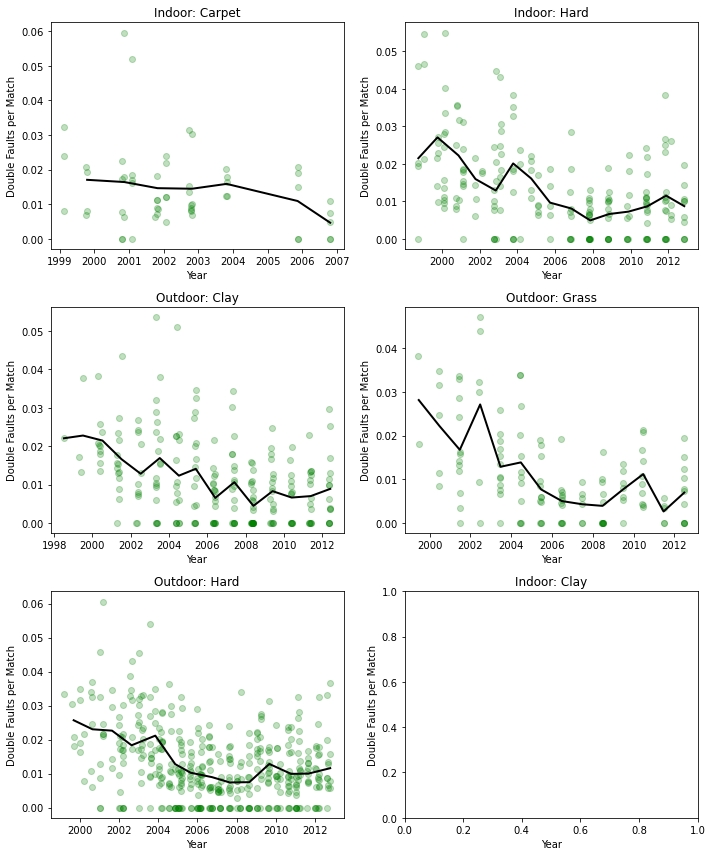

In [285]:
import datetime as dt

data = pd.read_csv('data/tennis.csv')#Read data

#Dub F per Match is a ratio of player double faults / their total points total 
data['Double Faults per Match'] = data['player1 double faults'] / data['player1 total points total']

#Convert start date to datetime object. Pass over changes
data['start date'] = pd.to_datetime(data['start date'])

data = data.dropna()#Drop NaN values

n = 0 #Start a counter for each surface-type
surfaces = data['surface'].sort_values().unique().tolist() #Create a list of each surface-type

#Graph. 
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
try:
    for i in range(3): #nrows
        for j in range(2): #ncols
            #Create a temp DF for each of the surface-types. Changes each loop
            temp_df = data[data['surface'] == surfaces[n]]

            #Replace data with temp_df. Each surface-type
            axes[i,j].scatter(temp_df['start date'],temp_df['Double Faults per Match'],alpha=.25,c='green')

            #Group temp_df by year and extract max and mean as per previous example. (Replace yearly_gb)
            axes[i,j].plot(pd.to_datetime(temp_df.groupby('year')['start date'].max()),
                           temp_df.groupby('year')['Double Faults per Match'].mean(),lw=2,c='black')

            axes[i,j].set_xlabel('Year') #need 'set_'
            axes[i,j].set_ylabel('Double Faults per Match')
            axes[i,j].set_title(surfaces[n]) #Each surface-type becomes title
    
            n += 1 #add 1 to counter each loop

except IndexError: exit #there is no Indoor: Clay data

axes[2,1].set_title('Indoor: Clay')
axes[2,1].set_xlabel('Year')
axes[2,1].set_ylabel('Double Faults per Match')


plt.tight_layout()

plt.show()

In [272]:
surfaces = data['surface'].sort_values().unique().tolist()

In [273]:
surfaces

['Indoor: Carpet',
 'Indoor: Hard',
 'Outdoor: Clay',
 'Outdoor: Grass',
 'Outdoor: Hard']